Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [1]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {46%} suciedad vehiculo => Vehiculo-1 
Removido  {50%} suciedad vehiculo => Vehiculo-2 
Removido  {42%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado a las 7.00.
Vehiculo [Vehiculo-2] lavado a las 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 7.00.
Llega vehiculo: Vehiculo-6 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Removido  {82%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehiculo-4] lavado a las 14.0

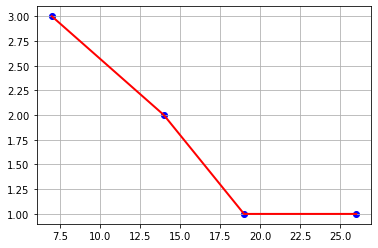

In [2]:
# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Llega vehiculo: Bus-3 a la hora 0.00.
Llega vehiculo: Automovil-3 a la hora 0.00.
Llega vehiculo: Furgoneta-3 a la hora 0.00.
Llega vehiculo: Bus-4 a la hora 0.00.
Llega vehiculo: Automovil-4 a la hora 0.00.
Llega vehiculo: Furgoneta-4 a la hora 0.00.
Llega vehiculo: Bus-5 a la hora 0.00.
Llega vehiculo: Automovil-5 a la hora 0.00.
Llega vehiculo: Furgoneta-5 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {46%} suciedad vehiculo => Automovil-1 
Vehic

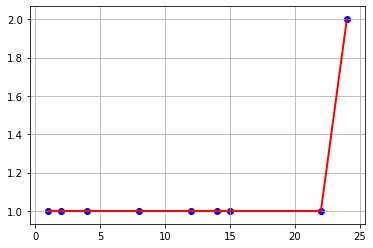

In [4]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
            
        k=env.now
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' \
              % (random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
        
        k=env.now
        if k in tiempo:
             tiempo[k]=tiempo[k]+1
        else:
             tiempo[k]=1
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion del hospital, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el porcentaje de cada edad, en numero de consultorios y el numero de camas o repiradores artificiales y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala (por tipo de paciente: niño, adolescente, adulto y adulto mayor).
- Tiempo promedio total que requiere un paciente para ser atendido desde cero (por cada tipo de paciente).
- Cuántos pacientes de cada tipo se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.

## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 

In [10]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as pp

In [96]:
#datos iniciales
MAX_PACIENTES = 100
MAX_CAMAS = 130
TIEMPO_SIMULACION = 250

tiempo_inicial_nino = 0
tiempo_inicial_adolecente = 0
tiempo_inicial_adulto = 0
tiempo_inicial_adulto_mayor = 0

TIEMPO_TEST_RAPIDO = 10

infectados = []
descartados = []


t1 = []
t2 = []
t3 = []
t4 = []


c1 = []
c2 = []
c3 = []
c4 = []


In [97]:
class Paciente:
    nombre = ''
    edad = 0
    estado = False

    def __init__(self, nombre, edad, estado):
        self.nombre = nombre
        self.edad = edad
        self.estado = estado

In [98]:
class Hospital:
    def __init__(self, enviroment, num_camas, num_test):
        self.enviroment = enviroment
        self.camas = simpy.Resource(enviroment, num_camas)
        self.test = simpy.Resource(enviroment, num_test)
    def realizar_test(self, paciente):
        if  self.tiempo(paciente) == 'n':
            t1.append(TIEMPO_TEST_RAPIDO)
        if  self.tiempo(paciente) == 'a':
            t2.append(TIEMPO_TEST_RAPIDO)
        if  self.tiempo(paciente) == 'm':
            t3.append(TIEMPO_TEST_RAPIDO)
        if  self.tiempo(paciente) == 'am':
            t4.append(TIEMPO_TEST_RAPIDO)
        yield self.enviroment.timeout(TIEMPO_TEST_RAPIDO)
        
        p = random.randint(1, 100)
        if  p > 50:
            infectados.append(1)
            print('Paciente', paciente.nombre, 'presenta COVIS-19, pero es necesario hospitalizacion')
            paciente.estado = True
        else:
            descartados.append(1)
            print('Paciente', paciente.nombre, 'presenta COVIS-19, pero NO es necesario hospitalizacion')
            paciente.estado = False
            #validar si es + o -
        
    def zona_aislamiento(self, paciente):
        
        t = random.randint(1, 16)
        self.tiempo(paciente)
        if  self.tiempo(paciente) == 'n':
            t1.append(t)
        if  self.tiempo(paciente) == 'a':
            t2.append(t)
        if  self.tiempo(paciente) == 'm':
            t3.append(t)
        if  self.tiempo(paciente) == 'am':
            t4.append(t)
        yield self.enviroment.timeout(t)
        print('El paciente', paciente.nombre, 'termina su recuperacion en', t)
        
        
    def tiempo(self, paciente):
        if paciente.edad > 4 and paciente.edad < 13:
            return 'n'
        if paciente.edad > 12 and paciente.edad < 16:
            return 'a'
        if paciente.edad > 17 and paciente.edad < 60:
            return 'm'
        if paciente.edad > 60:
            return 'am'

In [99]:
def contar(edad):
        if edad > 4 and edad < 13:
            c1.append(1)
        if edad > 12 and edad < 16:
            c2.append(1)
        if edad > 17 and edad < 60:
            c3.append(1)
        if edad > 60:
            c4.append(1)
def llegada_paciente(enviroment, paciente, hospital):
    print('Llega el paciente: %s a la hora %.2f' %(paciente.nombre, enviroment.now))
    
    with hospital.test.request() as test:
        
        yield test
        print('El paciente', paciente.nombre, 'se realiza el test a la Hora: ',enviroment.now)
        yield enviroment.process(hospital.realizar_test(paciente))
        
        #hospital.tiempo(paciente)
    if paciente.estado:
            with hospital.camas.request() as cama:
                yield cama
                print(paciente.nombre,' se le asigna a una cama', enviroment.now)
                yield enviroment.process(hospital.zona_aislamiento(paciente))
    
def ejecutar(enviroment, num_camas, num_test):
    hospital = Hospital(enviroment, num_camas, num_test)
    for i in range(1,5):
        edad = random.randint(5, 65)
        contar(edad)
        paciente = Paciente('paciente(%d)'% i, edad, False)
        enviroment.process(llegada_paciente(enviroment, paciente, hospital))
        paciente = None

    while True:
        yield enviroment.timeout(random.randint(10-3, 10+3))
        edad = random.randint(5, 65)
        contar(edad)
        i += 1
        paciente = Paciente('paciente(%d)'% i, edad, False)
        enviroment.process(llegada_paciente(enviroment, paciente, hospital))
        paciente = None
enviroment=simpy.Environment()
enviroment.process(ejecutar(enviroment, 12, 19))
enviroment.run(until = 30)

promedio1 = np.mean(t1)
promedio2 = np.mean(t2)
promedio3 = np.mean(t3)
promedio4 = np.mean(t4)
print('PROMEDIOS')
print('Promedio niños:',promedio1, 'Tiempo total empleado:',sum(t1))
print('Promedio adolecentes:',promedio2,  'Tiempo total empleado:',sum(t2))
print('Promedio Adultos:',promedio3,  'Tiempo total empleado:',sum(t3))
print('Promedio Adultos-Mayores:',promedio4,  'Tiempo total empleado:',sum(t4))

print('TOTAL')
print('Total de niños:', len(c1))
print('Total de adolecentes:', len(c2))
print('Total de Adultos:', len(c3))
print('Total de Adultos Matoyes:', len(c4))

print('Infectados')
print(len(infectados))
print('Descartados')
print(len(descartados))

Llega el paciente: paciente(1) a la hora 0.00
Llega el paciente: paciente(2) a la hora 0.00
Llega el paciente: paciente(3) a la hora 0.00
Llega el paciente: paciente(4) a la hora 0.00
El paciente paciente(1) se realiza el test a la Hora:  0
El paciente paciente(2) se realiza el test a la Hora:  0
El paciente paciente(3) se realiza el test a la Hora:  0
El paciente paciente(4) se realiza el test a la Hora:  0
Paciente paciente(1) presenta COVIS-19, pero es necesario hospitalizacion
Paciente paciente(2) presenta COVIS-19, pero NO es necesario hospitalizacion
Paciente paciente(3) presenta COVIS-19, pero es necesario hospitalizacion
Paciente paciente(4) presenta COVIS-19, pero es necesario hospitalizacion
paciente(1)  se le asigna a una cama 10
paciente(3)  se le asigna a una cama 10
paciente(4)  se le asigna a una cama 10
Llega el paciente: paciente(5) a la hora 11.00
El paciente paciente(5) se realiza el test a la Hora:  11
El paciente paciente(4) termina su recuperacion en 6
El paciente

/Users/fernandocuscomejia/opt/anaconda3/envs/simulacion/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandocuscomejia/opt/anaconda3/envs/simulacion/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
